In [2]:
import numpy as np
def loadfile(fileName,delimiter):
    '''载入文件，转换为矩阵（数组）'''
    outlist = []
    with open(fileName) as fr:
        for line in fr.readlines():
            s = line.strip().split(delimiter) # 以delimiter为分隔标志
            outlist.append(list(map(float,s)))# list(map(func,iter))才能读取到map()内存的数
    return np.array(outlist)

# path = r'C:\Users\beidongjiedeguang\Documents\machinelearninginaction\Ch10'
path = '/run/media/kunyuan/30DC8CBBDC8C7D3A/Documents and Settings/beidongjiedeguang/My Documents/machinelearninginaction/Ch10'
fileName = path +'/testSet2.txt'
data = loadfile(fileName,'\t')

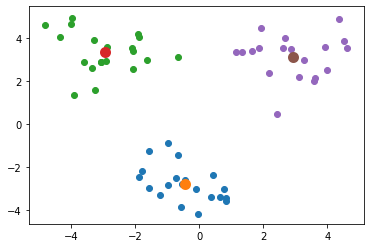

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import k_means 
from sklearn.neighbors import KNeighborsClassifier as knn
k = 3
res= k_means(data,k)
res
center = res[0]
subcenter = res[1]
subcenter
#---------------------------------
plt.figure()
for cent in range(k):
    plt.scatter(data[np.nonzero(subcenter==cent)[0],0],data[np.nonzero(subcenter==cent)[0],1])
    plt.scatter(center[:,0][cent],center[:,1][cent],linewidths=5)
plt.show()

In [6]:
model = knn(n_neighbors=5)
model.fit(data,subcenter)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

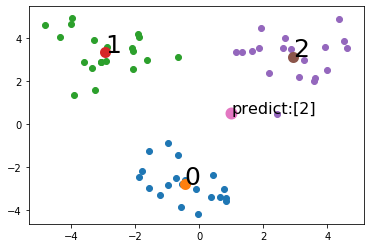

In [9]:
point = np.array([[1,0.5]])
predict = model.predict(point)
# ----------------------------------
for cent in range(k):
    plt.scatter(data[np.nonzero(subcenter==cent)[0],0],data[np.nonzero(subcenter==cent)[0],1])
    plt.scatter(center[:,0][cent],center[:,1][cent],linewidths=5)
    plt.text(center[:,0][cent],center[:,1][cent],'{}'.format(cent),fontsize=25)

plt.scatter(point[0][0],point[0][1],linewidths=6)
plt.text(point[0][0],point[0][1],'predict:{}'.format(predict),fontsize=16)
plt.show()